### 데이터 인코딩

* 레이블 인코딩(Label encoding)

In [ ]:
from sklearn.preprocessing import LabelEncoder

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# LabelEncoder를 객체로 생성한 후 , fit( ) 과 transform( ) 으로 label 인코딩 수행. 
encoder = LabelEncoder()
encoder.fit(items)
labels = encoder.transform(items)
print('인코딩 변환값:',labels)

In [ ]:
print('인코딩 클래스:',encoder.classes_)

In [ ]:
print('디코딩 원본 값:',encoder.inverse_transform([4, 5, 2, 0, 1, 1, 3, 3]))

* 원-핫 인코딩(One-Hot encoding)

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# list
items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서'] 

# 2차원 ndarray 변환
items = np.array(items).reshape(-1,1)
items

array([['TV'],
       ['냉장고'],
       ['전자레인지'],
       ['컴퓨터'],
       ['선풍기'],
       ['선풍기'],
       ['믹서'],
       ['믹서']], dtype='<U5')

In [2]:
# 원-핫 오브젝트 생성
oh_encoder = OneHotEncoder()
# 선작업 : 중복제거, 컬럼 설정
oh_encoder.fit(items)
# 변환
oh_labels = oh_encoder.transform(items)
oh_labels

<8x6 sparse matrix of type '<class 'numpy.float64'>'
	with 8 stored elements in Compressed Sparse Row format>

In [3]:
oh_labels.toarray()

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.]])

In [4]:
oh_labels.shape

(8, 6)

In [5]:
df = pd.DataFrame({
    'item' : ['TV','냉장고','전자','컴퓨터','선풍기','선풍기','믹서','믹서']
})
df

,item
0,TV
1,냉장고
2,전자
3,컴퓨터
4,선풍기
5,선풍기
6,믹서
7,믹서


In [8]:
# pandas.get_dummies(
#       data
#     , prefix=None 원래 컬럼명 접두사
#     , prefix_sep='_'
#     , dummy_na=False
#     , columns=None
#     , sparse=False
#     , drop_first=False
#     , dtype=None
# )

In [6]:
pd.get_dummies(df)

,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자,item_컴퓨터
0,True,False,False,False,False,False
1,False,True,False,False,False,False
2,False,False,False,False,True,False
3,False,False,False,False,False,True
4,False,False,False,True,False,False
5,False,False,False,True,False,False
6,False,False,True,False,False,False
7,False,False,True,False,False,False


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items=['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서']

# 2차원 ndarray로 변환합니다. 
items = np.array(items).reshape(-1, 1)

# 원-핫 인코딩을 적용합니다. 
oh_encoder = OneHotEncoder()
oh_encoder.fit(items)
oh_labels = oh_encoder.transform(items)

# OneHotEncoder로 변환한 결과는 희소행렬이므로 toarray()를 이용해 밀집 행렬로 변환. 
print('원-핫 인코딩 데이터')
print(oh_labels.toarray())
print('원-핫 인코딩 데이터 차원')
print(oh_labels.shape)


In [ ]:
import pandas as pd

df = pd.DataFrame({'item':['TV','냉장고','전자레인지','컴퓨터','선풍기','선풍기','믹서','믹서'] })
pd.get_dummies(df)

### 피처 스케일링과 정규화

* StandardScaler

In [9]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)
iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
# 각 컬럼의 평균과 분산 추출
print(iris_df.mean(), iris_df.var())

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64 sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


In [16]:
from sklearn.preprocessing import StandardScaler

# 
scaler = StandardScaler()
# fit : 선작업 => stadev, mean
scaler.fit(iris_df) # 컬럼별로 처리
iris_scaled = scaler.transform(iris_df) # return ndarray

# dataframe 
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_df_scaled
print(iris_df_scaled.mean(), iris_df_scaled.var())

sepal length (cm)   -1.690315e-15
sepal width (cm)    -1.842970e-15
petal length (cm)   -1.698641e-15
petal width (cm)    -1.409243e-15
dtype: float64 sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
# 붓꽃 데이터 셋을 로딩하고 DataFrame으로 변환합니다. 
iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data=iris_data, columns=iris.feature_names)

print('feature 들의 평균 값')
print(iris_df.mean())
print('\nfeature 들의 분산 값')
print(iris_df.var())


In [ ]:
from sklearn.preprocessing import StandardScaler

# StandardScaler객체 생성
scaler = StandardScaler()
# StandardScaler 로 데이터 셋 변환. fit( ) 과 transform( ) 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

#transform( )시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature 들의 평균 값')
print(iris_df_scaled.mean())
print('\nfeature 들의 분산 값')
print(iris_df_scaled.var())

* MinMaxScaler

In [17]:
# 기존 데이터를 0부터 1사이 값을 정규화 처리
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(iris_df) # 원본데이터
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_df_scaled

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [18]:
print(iris_df_scaled.min(), iris_df_scaled.max()) # 컬럼별 처리

sepal length (cm)    0.0
sepal width (cm)     0.0
petal length (cm)    0.0
petal width (cm)     0.0
dtype: float64 sepal length (cm)    1.0
sepal width (cm)     1.0
petal length (cm)    1.0
petal width (cm)     1.0
dtype: float64


In [ ]:
from sklearn.preprocessing import MinMaxScaler

# MinMaxScaler객체 생성
scaler = MinMaxScaler()
# MinMaxScaler 로 데이터 셋 변환. fit() 과 transform() 호출.  
scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

# transform()시 scale 변환된 데이터 셋이 numpy ndarry로 반환되어 이를 DataFrame으로 변환
iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
print('feature들의 최솟값')
print(iris_df_scaled.min())
print('\nfeature들의 최댓값')
print(iris_df_scaled.max())


* Scaler를 이용하여 학습 데이터와 테스트 데이터에 fit(), transform(), fit_transform() 적용 시 유의사항. 

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# 학습 데이터는 0 부터 10까지, 테스트 데이터는 0 부터 5까지 값을 가지는 데이터 세트로 생성
# Scaler클래스의 fit(), transform()은 2차원 이상 데이터만 가능하므로 reshape(-1, 1)로 차원 변경
train_array = np.arange(0, 11).reshape(-1, 1)
test_array =  np.arange(0, 6).reshape(-1, 1)

In [ ]:
# MinMaxScaler 객체에 별도의 feature_range 파라미터 값을 지정하지 않으면 0~1 값으로 변환
scaler = MinMaxScaler()

# fit()하게 되면 train_array 데이터의 최솟값이 0, 최댓값이 10으로 설정.
scaler.fit(train_array)

# 1/10 scale로 train_array 데이터 변환함. 원본 10-> 1로 변환됨.
train_scaled = scaler.transform(train_array)

print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

In [ ]:
# MinMaxScaler에 test_array를 fit()하게 되면 원본 데이터의 최솟값이 0, 최댓값이 5로 설정됨
scaler.fit(test_array)

# 1/5 scale로 test_array 데이터 변환함. 원본 5->1로 변환.
test_scaled = scaler.transform(test_array)

# test_array의 scale 변환 출력.
print('원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))


In [ ]:
scaler = MinMaxScaler()
scaler.fit(train_array)
train_scaled = scaler.transform(train_array)
print('원본 train_array 데이터:', np.round(train_array.reshape(-1), 2))
print('Scale된 train_array 데이터:', np.round(train_scaled.reshape(-1), 2))

# test_array에 Scale 변환을 할 때는 반드시 fit()을 호출하지 않고 transform() 만으로 변환해야 함. 
test_scaled = scaler.transform(test_array)
print('\n원본 test_array 데이터:', np.round(test_array.reshape(-1), 2))
print('Scale된 test_array 데이터:', np.round(test_scaled.reshape(-1), 2))


In [27]:
from scipy import stats
stats.shapiro(iris_df['petal length (cm)'])


ShapiroResult(statistic=0.8762685656547546, pvalue=7.412652158755861e-10)

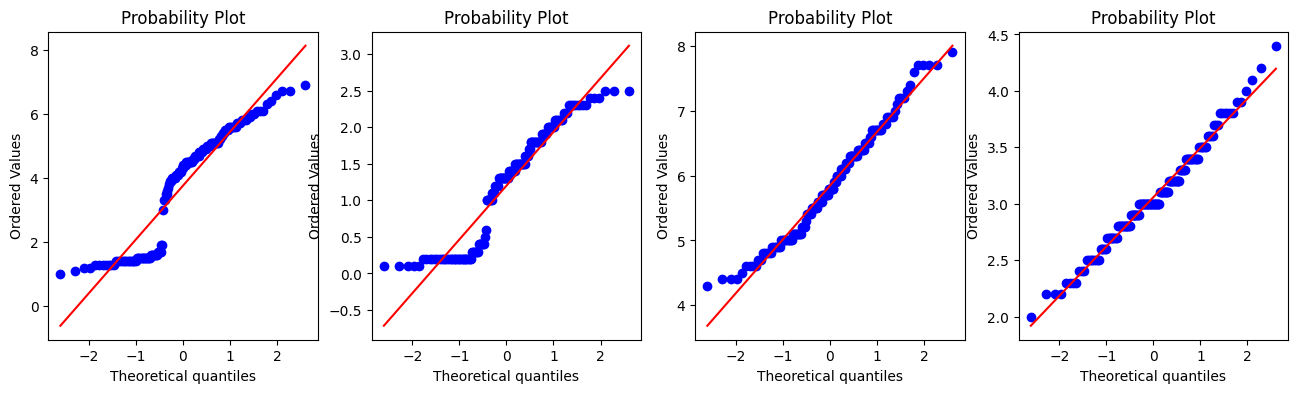

In [26]:
# 정규분포 확인
# scipy 패키지의 stats.shapiro() 함수 : 수치값이 출력
from scipy import stats
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(16,4))
ax1 = fig.add_subplot(1,4,1)
ax2 = fig.add_subplot(1,4,2)
ax3 = fig.add_subplot(1,4,3)
ax4 = fig.add_subplot(1,4,4)

stats.probplot(iris_df['petal length (cm)'], dist=stats.norm, plot=ax1)
stats.probplot(iris_df['petal width (cm)'], dist=stats.norm, plot=ax2)
stats.probplot(iris_df['sepal length (cm)'], dist=stats.norm, plot=ax3)
stats.probplot(iris_df['sepal width (cm)'], dist=stats.norm, plot=ax4)
plt.show()